In [1]:
using Fussy

1.8552058877493714e-6

1.438673203623694e-6

In [15]:
Fussy.K_LP(Fussy.proteus_deck())*6^2

6.678741195897737e-5

In [16]:
Fussy.K_RP(Fussy.proteus_deck())*7200/11.25^(3/2)

0.000274514865553918

In [4]:
Fussy.proteus_deck()

Fussy.Reactor
  T_bar: SymEngine.Basic
  n_bar: SymEngine.Basic
  I_P: SymEngine.Basic
  R_0: SymEngine.Basic
  B_0: SymEngine.Basic
  sigma_v: SymEngine.Basic
  mode_scaling: Dict{Symbol,Float64}
  deck: Symbol proteus
  is_pulsed: Bool true
  is_symbolic: Bool false
  is_consistent: Bool false
  is_solved: Bool false
  is_valid: Bool true
  is_good: Bool true
  H: Float64 1.0
  Q: Float64 25.0
  epsilon: Float64 0.3
  kappa_95: Float64 1.8
  delta_95: Float64 0.35
  nu_n: Float64 0.4
  nu_T: Float64 1.1
  Z_eff: Float64 1.75
  f_D: Float64 0.9
  A: Float64 2.5
  l_i: Float64 0.632845
  rho_m: Float64 0.0006866388987711343
  gamma: Float64 1.0000004714731996
  N_G: Float64 0.9
  eta_T: Float64 0.4
  eta_RF: Float64 0.5
  tau_FT: Float64 7200.0
  C_ejima: Float64 0.3
  pi: Float64 3.141592653589793
  speed_of_light: Float64 3.0e8
  B_CS: Float64 20.0
  k: Float64 0.4
  sigma_CS: Float64 600.0
  sigma_TF: Float64 300.0
  J_CS: Float64 50.0
  J_TF: Float64 200.0
  max_beta_N: Float64 0.0

In [1]:
addprocs(8)

@everywhere using Fussy
using Plots

cur_param = :H
cur_deck = :arc
is_pulsed = false
is_consistent = true
cur_sensitivity = 1.0
cur_num_points = 41


cur_study = Study(
cur_param,
deck = cur_deck,
is_pulsed = is_pulsed,
is_consistent = is_consistent,
sensitivity = cur_sensitivity,
num_points = cur_num_points,
)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:38
Progress: 100%|█████████████████████████████████████████| Time: 0:00:12
Progress: 100%|█████████████████████████████████████████| Time: 0:05:03
Progress: 100%|█████████████████████████████████████████| Time: 0:04:42


Fussy.Study(AbstractFloat[0.0, 0.09, 0.18, 0.27, 0.36, 0.45, 0.54, 0.63, 0.72, 0.81  …  2.79, 2.88, 2.97, 3.06, 3.15, 3.24, 3.33, 3.42, 3.51, 3.6], :H, 1.8, 1.0, 41, :arc, Fussy.Reactor[], Fussy.Reactor[Fussy.Reactor
  T_bar: Float64 25.5588
  n_bar: Float64 0.833838
  I_P: Float64 19.9675
  R_0: Float64 6.35171
  B_0: Float64 7.70688
  sigma_v: Float64 0.349012
  mode_scaling: Dict{Symbol,Float64}
  deck: Symbol arc
  is_pulsed: Bool false
  is_symbolic: Bool false
  is_consistent: Bool true
  is_solved: Bool false
  is_valid: Bool true
  is_good: Bool true
  H: Float64 1.26
  Q: Float64 13.6
  epsilon: Float64 0.3333
  kappa_95: Float64 1.84
  delta_95: Float64 0.333
  nu_n: Float64 0.385
  nu_T: Float64 0.929
  Z_eff: Float64 1.2
  f_D: Float64 0.9
  A: Float64 2.5
  l_i: Float64 0.67
  rho_m: Float64 0.0
  gamma: Float64 0.680199
  N_G: Float64 0.67
  eta_T: Float64 0.4
  eta_RF: Float64 0.5
  tau_FT: Float64 1.6e9
  C_ejima: Float64 0.3
  pi: Float64 3.14159
  speed_of_light: Floa


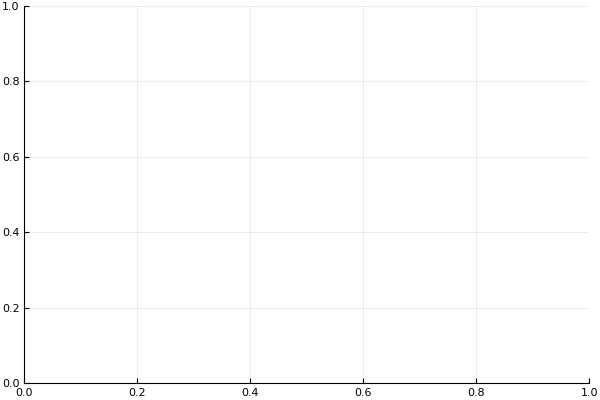

In [43]:
cur_plot = plot()

In [44]:
savefig(cur_plot, "../images/example_1.png")


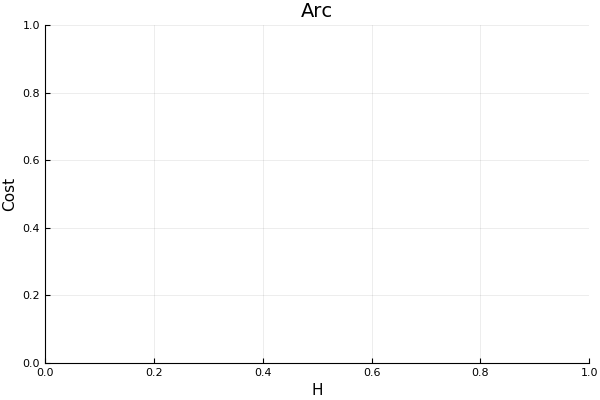

In [45]:
title!("Arc")
xlabel!("H")
ylabel!("Cost")

In [46]:
savefig(cur_plot, "../images/example_2.png")

In [47]:
for (cur_key, cur_value) in cur_dict
    cur_x = map(cur_reactor -> cur_reactor.H, cur_value)
    cur_y = map(cur_reactor -> cur_reactor.cost, cur_value)
    
    plot!(cur_x, cur_y, label=cur_key)
end

plot!()

In [36]:
savefig(cur_plot, "../images/example_3.png")


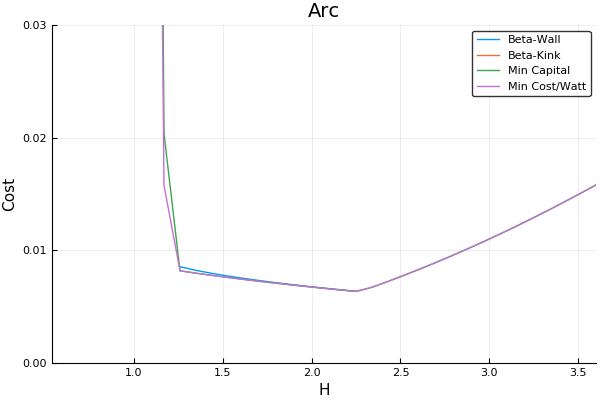

In [49]:
ylims!(0,0.03)

In [50]:
savefig(cur_plot, "../images/example_4.png")

In [3]:
cur_dict = Dict()

cur_dict["Beta-Wall"] = cur_study.wall_reactors
cur_dict["Beta-Kink"] = cur_study.kink_reactors
cur_dict["Min Cost per Watt"] = cur_study.cost_reactors
cur_dict["Min Capital Cost"] = cur_study.W_M_reactors

for (cur_key, cur_value) in cur_dict
     cur_dict[cur_key] = filter(
        cur_reactor -> cur_reactor.is_valid,
        deepcopy(cur_value)
    )
end

In [4]:
cur_dict

Dict{Any,Any} with 4 entries:
  "Beta-Wall"     => Fussy.Reactor[Fussy.Reactor…
  "Beta-Kink"     => Fussy.Reactor[]
  "Min Capital"   => Fussy.Reactor[Fussy.Reactor…
  "Min Cost/Watt" => Fussy.Reactor[Fussy.Reactor…

In [ ]:
searchdir("../images",r".tex$")

In [ ]:
function rreplace(varargs...;kwargs...) 
    varargs = map(
        vararg -> isa(vararg, AbstractString) ? reverse(vararg) : vararg,
        varargs
    )
    
    reverse(replace(varargs...;kwargs...))
end

In [ ]:
foo = "fizz_buzz_fizz_buzz_fizz_buzz_fizz_buzz_fizz_buzz"

rreplace(foo, "buzz", "bar", 2)

In [ ]:
using Fussy
Main.IJulia.set_current_module(Fussy)

In [ ]:
# Pkg.pin("Interact", v"0.7.2")
# Pkg.pin("GR",v"0.28.0")
# Pkg.pin("Plots", v"0.17.3")

In [ ]:
using Interact
using FileIO
using JLD2
using Plots

In [ ]:
cur_decks = [
    :proteus, # pulsed
    :charybdis, # steady state
    :arc, :act_1, :act_2,
    :demo_steady, :demo_pulsed
]

cur_sensitivity = 0.35

cur_params = [ 
    :H, :Q, :wave_theta,
    :epsilon, :delta_95,
    :nu_n, :nu_T, :l_i,
    :N_G, :f_D, :Z_eff,
    :eta_CD, :B_CS, :tau_FT
]

return

In [ ]:
cur_fields = [ 
    "T_bar", "n_bar", "I_P", "R_0", "B_0", "R_CS",
    "P_F", "f_IN", "f_BS", "f_CD", "W_M", "cost", "eta_CD",
    "norm_beta_N", "norm_q_95", "norm_P_E", "norm_P_W", "b", "c", "d", "P_E"
]

cur_fields = map(zz -> Symbol(zz), cur_fields)

append!(cur_fields, cur_params)

cur_fields = sort(cur_fields)

cur_x_list = deepcopy(cur_fields)
cur_y_list = deepcopy(cur_fields)

deleteat!(cur_x_list, find(cur_field -> cur_field == :B_0, cur_x_list))
deleteat!(cur_y_list, find(cur_field -> cur_field == :cost, cur_y_list))

deleteat!(cur_x_list, find(cur_field -> cur_field == :cost, cur_x_list))
deleteat!(cur_y_list, find(cur_field -> cur_field == :B_0, cur_y_list))

unshift!(cur_y_list, :B_0)
unshift!(cur_x_list, :cost)

unshift!(cur_x_list, :B_0)
unshift!(cur_y_list, :cost)


In [ ]:
cur_samplings = load("../data/samplings.jld2", "cur_samplings") 

for (cur_key, cur_value) in cur_samplings
    for cur_index in 1:cur_value.study_count*100
        try
            cur_value.wall_reactors[cur_index]
        catch cur_error
            println(cur_index, " - ", ( cur_index == cur_value.study_count + 1 ))
            break 
        end
        if is_present(cur_value.wall_reactors[cur_index]) && is_present(cur_value.cost_reactors[cur_index])
            cur_error = abs(cur_value.wall_reactors[cur_index].cost-cur_value.cost_reactors[cur_index].cost)
            ( cur_error < 1e-4 ) && ( cur_value.cost_reactors[cur_index] = nothing )
        end
        if is_present(cur_value.cost_reactors[cur_index]) && is_present(cur_value.W_M_reactors[cur_index])
            cur_error = abs(cur_value.cost_reactors[cur_index].cost-cur_value.W_M_reactors[cur_index].cost)
            ( cur_error < 1e-4 ) && ( cur_value.cost_reactors[cur_index] = nothing )
        end
        if is_present(cur_value.kink_reactors[cur_index]) && is_present(cur_value.W_M_reactors[cur_index])
            cur_error = abs(cur_value.kink_reactors[cur_index].cost-cur_value.W_M_reactors[cur_index].cost)
            ( cur_error < 1e-4 ) && ( cur_value.W_M_reactors[cur_index] = nothing )
        end
        if is_present(cur_value.kink_reactors[cur_index]) && is_present(cur_value.cost_reactors[cur_index])
            cur_error = abs(cur_value.kink_reactors[cur_index].cost-cur_value.cost_reactors[cur_index].cost)
            ( cur_error < 1e-4 ) && ( cur_value.cost_reactors[cur_index] = nothing )
        end
        if is_present(cur_value.wall_reactors[cur_index]) && is_present(cur_value.W_M_reactors[cur_index])
            cur_error = abs(cur_value.wall_reactors[cur_index].cost-cur_value.W_M_reactors[cur_index].cost)
            ( cur_error < 1e-4 ) && ( cur_value.W_M_reactors[cur_index] = nothing )
        end
        if is_present(cur_value.wall_reactors[cur_index]) && is_present(cur_value.kink_reactors[cur_index])
            cur_error = abs(cur_value.wall_reactors[cur_index].cost-cur_value.kink_reactors[cur_index].cost)
            ( cur_error < 1e-4 ) && ( cur_value.wall_reactors[cur_index] = nothing )
        end
    end
end

println("done.")

In [ ]:
markers = [:diamond, :pentagon,:circle, :square]
@manipulate for y in cur_y_list, x in cur_x_list, z in [:W_M, :P_F, :cost], w in [:P_F, :W_M, :cost], yscale=[:lin, :log], xscale=[:lin, :log], deck in cur_decks, limits=true,constraints=true, simple=true
    plot()
    
    cur_list = [:kink, :wall, :cost, :W_M]
    
    this_xx = []
    this_yy = []
    this_zz = []
    this_ww = []
    this_ss = []
    this_mm = []
    this_oo = []
    
    for (tmp_index, kind) in enumerate(cur_list)
        tmp_reacs = deepcopy(getfield(cur_samplings[deck], Symbol("$(kind)_reactors")))
        filter!(is_present, tmp_reacs)
        filter!(tmp_reac -> tmp_reac.is_valid, tmp_reacs)
        filter!(tmp_reac -> tmp_reac.is_good, tmp_reacs)

        filter!(tmp_reac -> tmp_reac.B_0 < 25, tmp_reacs)
        filter!(tmp_reac -> tmp_reac.R_0 < 25, tmp_reacs)
        filter!(tmp_reac -> tmp_reac.cost < 0.1, tmp_reacs)
        
        filter!(tmp_reac -> tmp_reac.norm_P_E < 0.8, tmp_reacs)
        
        isempty(tmp_reacs) && continue
        
        cur_xx = map(tmp_reac -> getfield(tmp_reac, x), tmp_reacs)
        cur_yy = map(tmp_reac -> getfield(tmp_reac, y), tmp_reacs)
        cur_zz = map(tmp_reac -> getfield(tmp_reac, z), tmp_reacs)
        cur_ww = map(tmp_reac -> getfield(tmp_reac, w), tmp_reacs)
        
        cur_mm = []
        for tmp_reac in tmp_reacs
            if simple 
                if isapprox(tmp_reac.norm_beta_N,1.0,rtol=1e-4)
                    tmp_m = markers[3] #:beta
                elseif isapprox(tmp_reac.norm_P_W,1.0,rtol=1e-4)
                    tmp_m = markers[2] #:wall
                else
                    @assert isapprox(tmp_reac.norm_q_95,1.0,rtol=1e-4)
                    tmp_m = markers[1] #:kink
                end
            else
                tmp_m = markers[tmp_index]
            end
            push!(cur_mm, tmp_m)
        end
    
        append!(this_oo, (tmp_index < 3 ? Int(limits) : Int(constraints))*ones(length(cur_zz)))
        append!(this_mm, cur_mm)
        append!(this_ss, map(tmp_m -> tmp_m ==:square ? 4/sqrt(2) : 4, cur_mm))
#         cur_ww = map(tmp_reac -> log10(getfield(tmp_reac, w)), tmp_reacs)
#         cur_ww .-= minimum(cur_ww)
#         cur_ww ./= maximum(cur_ww)
#         cur_ww .*= -1p
#         cur_ww .+= 1

#         cur_ww .-= 0.5
#         cur_ww *= 2

        append!(this_xx, cur_xx)
        append!(this_zz, cur_zz)
        append!(this_yy, cur_yy)
        append!(this_ww, cur_ww)
    end
    
    max_x = maximum(this_xx)
    max_y = maximum(this_yy)
    
    min_x = minimum(this_xx)
    min_y = minimum(this_yy)

        
    this_ww = -log10.(this_ww)
    
    this_ww -= minimum(this_ww)
    this_ww /= maximum(this_ww)
    
    this_ss += 2 * this_ww - 1
    
#     this_ss += 2
    
    this_zz = -log10.(this_zz)
    println(length(this_zz))
    
    sort_lists!(this_zz,this_xx,this_yy,this_ss,this_mm,this_oo,this_ww)

    this_oo .*= (ceil.((0.6+0.4*this_ww)*10)/10)
    this_ss = map(round,this_ss)
    for (tmp_index, tmp_label) in enumerate(cur_list)
        cur_label = nothing
        if simple
            ( tmp_index == 4 ) && continue
            
            cur_label = tmp_index == 3 ? :beta : tmp_label
        else
            cur_label = tmp_label
        end
        scatter!([],[],color=tmp_index < 3 ? tmp_index : tmp_index < 4  ? tmp_index + 1 : tmp_index + 3,label=cur_label,marker=markers[tmp_index])
    end
    scatter!(this_xx, this_yy,zcolor=this_zz, color=:viridis,markersize=this_ss, markershapes=this_mm, label="",opacity=this_oo, colorbar_title="Asdf")#, markersize=marker_size),marker=markers[tmp_index], label=kind

    max_x *= 1.25
    max_y *= 1.25
    
    in(x, [:R_0, :B_0]) && ( max_x = 25 )
    in(y, [:R_0, :B_0]) && ( max_y = 25 )
    
    in(x, [:f_IN, :f_BS, :f_CD, :norm_beta_N, :norm_P_W, :norm_q_95]) && ( max_x = 1.25 )
    in(y, [:f_IN, :f_BS, :f_CD, :norm_beta_N, :norm_P_W, :norm_q_95]) && ( max_y = 1.25 )
    
    ( x == :cost ) && ( max_x = 0.1 )
    ( y == :cost ) && ( max_y = 0.1 )
    
    min_x = xscale == :lin ? 0 : min_x / 1.25
    min_y = yscale == :lin ? 0 : min_y / 1.25
   
    ( x == :cost ) && ( min_x = min(min_x, 0.001) )
    ( y == :cost ) && ( min_y = min(min_y, 0.001) )
    
    xlims!(min_x, max_x)
    ylims!(min_y, max_y)
    
    plot!(yscale = yscale, xscale = xscale)
    
    ylabel!(string(y))
    xlabel!(string(x))
end